In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling #funcion para ver missing values por variables en DF**
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing,  svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.utils import resample
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
import mglearn
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [3]:
data = pd.read_csv('seismic-bumps-2.csv')


In [4]:
data.head()

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Data Processing

In [5]:
#valores omitidos por variable
missing_values_table(data)

,Missing Values,% of Total Values
Fseismic,0,0.0
seismoacoustic,0,0.0
shift,0,0.0
genergy,0,0.0
gpuls,0,0.0
gdenergy,0,0.0
gdpuls,0,0.0
ghazard,0,0.0
nbumps,0,0.0
nbumps2,0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
Fseismic          2584 non-null object
seismoacoustic    2584 non-null object
shift             2584 non-null object
genergy           2584 non-null float64
gpuls             2584 non-null float64
gdenergy          2584 non-null float64
gdpuls            2584 non-null float64
ghazard           2584 non-null object
nbumps            2584 non-null float64
nbumps2           2584 non-null float64
nbumps3           2584 non-null float64
nbumps4           2584 non-null float64
nbumps5           2584 non-null float64
nbumps6           2584 non-null float64
nbumps7           2584 non-null float64
nbumps89          2584 non-null float64
energy            2584 non-null float64
maxenergy         2584 non-null float64
class             2584 non-null int64
dtypes: float64(14), int64(1), object(4)
memory usage: 383.6+ KB


In [7]:
data[data.duplicated()]

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
89,a,a,N,63550.0,325.0,15.0,35.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
90,a,a,W,194580.0,697.0,-35.0,-32.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
972,a,b,N,5250.0,66.0,-49.0,36.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
973,a,b,N,19420.0,60.0,98.0,20.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1017,a,a,N,590.0,11.0,-74.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1018,a,a,N,3720.0,43.0,75.0,8.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
data_new =data.drop_duplicates()

In [9]:
data_new = data_new.drop(['energy','nbumps6','nbumps7','nbumps89'], axis=1)

### Desbalance de clases

In [10]:
data_new['class'].value_counts()

0    2408
1     170
Name: class, dtype: int64

In [11]:
data_new.head()

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0


# Normalizacion de Atributos

In [12]:
data_normal = data_new.copy()
data_normal =data_normal.drop(['class'],axis =1) 
data_normal.head()

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,maxenergy
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,2000.0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,3000.0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data_normal.shape

(2578, 14)

In [14]:
def numerizar_var(dataset):
    for c in dataset.columns:
        if dataset[c].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(dataset[c].values))
            dataset[c] = lbl.transform(list(dataset[c].values))
#data_normal.head()

In [15]:
def normalizar_var(dataset):
    num_cols = dataset.columns[dataset.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
    scaler = StandardScaler()
    dataset[num_cols] = scaler.fit_transform(dataset[num_cols])
    #data_normal.head()
    


In [16]:
def eval_modelo(modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print ('Train Accuracy:', accuracy_score(y_train, modelo.predict(X_train)))
    print( 'Test Accuracy :', accuracy_score(y_test, y_pred))
    print( 'F1 score +    :', f1_score(y_test, y_pred))
    print( 'Recall +      :', recall_score(y_test, y_pred))
    print('Precision +   :', precision_score(y_test, y_pred))
    print ('\n clasification report:\n', classification_report(y_test, y_pred))
    print ('\n Matriz de Confusion:\n',confusion_matrix(y_test, y_pred))


In [17]:
#Numerizar Data Set
numerizar_var(data_normal)
data_normal.head()

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,maxenergy
0,0,0,0,15180.0,48.0,-72.0,-72.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,14720.0,33.0,-70.0,-79.0,0,1.0,0.0,1.0,0.0,0.0,2000.0
2,0,0,0,8050.0,30.0,-81.0,-78.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,28820.0,171.0,-23.0,40.0,0,1.0,0.0,1.0,0.0,0.0,3000.0
4,0,0,0,12640.0,57.0,-63.0,-52.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Normalizar Data Set
normalizar_var(data_normal)
data_normal.head()

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,maxenergy
0,-0.733612,-0.771582,-1.347001,-0.327658,-0.873018,-1.050484,-1.210799,-0.307603,-0.631008,-0.502985,-0.511172,-0.243035,-0.068385,-0.221357
1,-0.733612,-0.771582,-1.347001,-0.329663,-0.899669,-1.025589,-1.321560,-0.307603,0.101427,-0.502985,0.787155,-0.243035,-0.068385,-0.118131
2,-0.733612,-0.771582,-1.347001,-0.358740,-0.904999,-1.162512,-1.305737,-0.307603,-0.631008,-0.502985,-0.511172,-0.243035,-0.068385,-0.221357
3,-0.733612,-0.771582,-1.347001,-0.268195,-0.654482,-0.440555,0.561380,-0.307603,0.101427,-0.502985,0.787155,-0.243035,-0.068385,-0.066519
4,-0.733612,-0.771582,-1.347001,-0.338731,-0.857028,-0.938456,-0.894338,-0.307603,-0.631008,-0.502985,-0.511172,-0.243035,-0.068385,-0.221357


In [19]:
data_normal.shape

(2578, 14)

In [20]:
X=np.array(data_normal )
y=np.array(data_new['class'])
print(X.shape,y.shape)

(2578, 14) (2578,)


###  Split train and test data sets: 80% Training and 20% testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

# RamdomForest

### Seleccion de los mejores parametros  Grid-Search para RadomForest

In [22]:
param_grid = {'class_weight':['balanced',{1:5},{1:10},{1:15},{1:20}],'n_estimators':[10,100,200]}            
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.93
Best parameters: {'class_weight': 'balanced', 'n_estimators': 200}
Best cross-validation score: 0.93
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


### Evaluacion Modelo con mejores parametros

In [23]:
clf_ = RandomForestClassifier(bootstrap=True, class_weight={1: 20}, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

eval_modelo(clf_)

Train Accuracy: 1.0
Test Accuracy : 0.9321705426356589
F1 score +    : 0.10256410256410256
Recall +      : 0.058823529411764705
Precision +   : 0.4

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       482
           1       0.40      0.06      0.10        34

   micro avg       0.93      0.93      0.93       516
   macro avg       0.67      0.53      0.53       516
weighted avg       0.90      0.93      0.91       516


 Matriz de Confusion:
 [[479   3]
 [ 32   2]]


In [24]:
clf = RandomForestClassifier(n_estimators=200,random_state=0, class_weight='balanced')
eval_modelo(clf)

Train Accuracy: 1.0
Test Accuracy : 0.9341085271317829
F1 score +    : 0.10526315789473684
Recall +      : 0.058823529411764705
Precision +   : 0.5

 clasification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       482
           1       0.50      0.06      0.11        34

   micro avg       0.93      0.93      0.93       516
   macro avg       0.72      0.53      0.54       516
weighted avg       0.91      0.93      0.91       516


 Matriz de Confusion:
 [[480   2]
 [ 32   2]]


#### Importancia dada por el modelo a las variables

In [25]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = data_normal.columns,columns=['importancia']).sort_values('importancia',ascending=False)
feature_importances 

,importancia
genergy,0.186868
gpuls,0.174365
gdenergy,0.134063
gdpuls,0.133419
maxenergy,0.102033
nbumps,0.081050
nbumps2,0.046329
nbumps3,0.041981
shift,0.036478
seismoacoustic,0.021461


In [1]:
imp = clf.feature_importances_
nombres = data_normal.columns
imp,nombres1 = zip(*sorted(zip(imp,nombres)))
plt.barh(range(len(nombres1)),imp, align='center')
plt.yticks(range(len(nombres1)),nombres1)
plt.xlabel('Importancia de Variables')
plt.ylabel('Variables')
plt.title("Importacioa de las caracteristicas")
plt.show()

NameError: name 'clf' is not defined

### Los resultado muestran que el modelo en términos generales tiene un muy buen desempeño en precisión y recall de la clase negativa (0), pero un desempeño muy bajo para la clase positiva (1), esto debido  al desbalanceo de clase y apesar de la penalizacion dada a la clase en el algoritmo: class_weight={1: 20}.

## ROC Curve
### Dado al desbalanceo de clase y para RandomForest es necesario tomar la probabilidad estimada de la clase positiva (1)

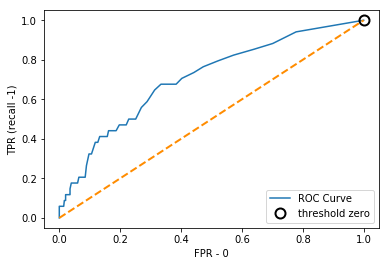

In [27]:
probas_ = clf_.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR - 0")
plt.ylabel("TPR (recall -1)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.legend(loc=4)

#### Area Bajo la Curva

In [28]:
svc_auc = roc_auc_score(y_test, probas_[:, 1])
svc_auc

0.7048144984134733

### los mejores resultados para la curva ROC se obtienen cuando están cerca al margen superior izquierdo (alto Recall y bajo FPR). En la gráfica se observa que la rata de falsos positivos es alta, y si se baja la rata FPR, el recall de la clase positiva decae.

# Evaluacion del modelo Balanceando Clases

#### Balanceo por  UPSample de la clase minoritaria

In [29]:

#https://elitedatascience.com/imbalanced-classes
# Separate majority and minority classes

df_majority = data_new[data_new['class']==0]
df_minority = data_new[data_new['class']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2408,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['class'].value_counts()
df_upsampled.head() 

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
y_=np.array(df_upsampled['class'])
df_upsampled = df_upsampled.drop('class', axis=1)
numerizar_var(df_upsampled)
normalizar_var(df_upsampled)
X_=np.array(df_upsampled )
df_upsampled.head()

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,maxenergy
0,-0.861262,-0.776193,-1.790562,-0.467646,-0.972706,-1.156454,-1.313846,-0.297723,-0.840986,-0.687214,-0.664676,-0.305537,-0.07077,-0.326078
1,-0.861262,-0.776193,-1.790562,-0.469376,-0.993931,-1.129465,-1.429588,-0.297723,-0.261145,-0.687214,0.324533,-0.305537,-0.07077,-0.212918
2,-0.861262,-0.776193,-1.790562,-0.494468,-0.998176,-1.277901,-1.413053,-0.297723,-0.840986,-0.687214,-0.664676,-0.305537,-0.07077,-0.326078
3,-0.861262,-0.776193,-1.790562,-0.416333,-0.798661,-0.495239,0.538031,-0.297723,-0.261145,-0.687214,0.324533,-0.305537,-0.07077,-0.156338
4,-0.861262,-0.776193,-1.790562,-0.477201,-0.959971,-1.035006,-0.983154,-0.297723,-0.840986,-0.687214,-0.664676,-0.305537,-0.07077,-0.326078


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.4, random_state=0)  

In [32]:
clf_ = RandomForestClassifier(bootstrap=True, class_weight={1: 20}, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

eval_modelo(clf_)

Train Accuracy: 1.0
Test Accuracy : 0.9849507005708354
F1 score +    : 0.9852866565195332
Recall +      : 1.0
Precision +   : 0.971

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       956
           1       0.97      1.00      0.99       971

   micro avg       0.98      0.98      0.98      1927
   macro avg       0.99      0.98      0.98      1927
weighted avg       0.99      0.98      0.98      1927


 Matriz de Confusion:
 [[927  29]
 [  0 971]]


#### Balanceo por  DownSample de la clase Mayoritaria

In [33]:
#https://elitedatascience.com/imbalanced-classes

# Separate majority and minority classes
df_majority = data_new[data_new['class']==0]
df_minority = data_new[data_new['class']==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=170,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled['class'].value_counts()

1    170
0    170
Name: class, dtype: int64

In [34]:
y_=np.array(df_downsampled['class'])
df_upsampled = df_downsampled.drop('class', axis=1)
numerizar_var(df_downsampled)
normalizar_var(df_downsampled)
X_=np.array(df_downsampled )
df_downsampled.head()

,Fseismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,maxenergy,class
2367,-0.857143,-0.843830,0.577350,-0.410805,-0.456961,-0.346517,-0.257889,-0.366871,-0.258452,-0.680659,0.331524,-0.283693,-0.076923,-0.037520,-1.0
1191,-0.857143,1.081689,0.577350,-0.408980,-0.112707,-0.006369,0.688074,-0.366871,-0.829060,-0.680659,-0.657232,-0.283693,-0.076923,-0.240685,-1.0
1151,-0.857143,1.081689,-1.732051,-0.467646,-0.541540,0.209057,0.498882,-0.366871,-0.829060,-0.680659,-0.657232,-0.283693,-0.076923,-0.240685,-1.0
2570,1.166667,-0.843830,0.577350,-0.424219,-0.492573,0.537866,0.189294,-0.366871,-0.829060,-0.680659,-0.657232,-0.283693,-0.076923,-0.240685,-1.0
550,-0.857143,1.081689,-1.732051,-0.505893,-0.896181,-0.380532,0.877267,-0.366871,-0.258452,-0.680659,0.331524,-0.283693,-0.076923,-0.159419,-1.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.4, random_state=0)  

In [36]:
clf_ = RandomForestClassifier(bootstrap=True, class_weight={1: 20}, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

eval_modelo(clf_)

Train Accuracy: 1.0
Test Accuracy : 1.0
F1 score +    : 1.0
Recall +      : 1.0
Precision +   : 1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        62

   micro avg       1.00      1.00      1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136


 Matriz de Confusion:
 [[74  0]
 [ 0 62]]


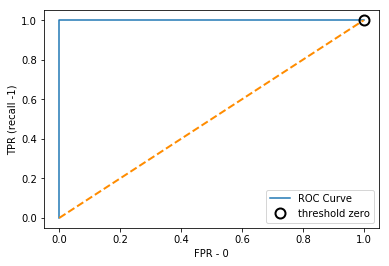

In [37]:
probas_ = clf_.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR - 0")
plt.ylabel("TPR (recall -1)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.legend(loc=4)

### Se observa que balanceando el set de datos por el método "resample" los resultados son muy buenos para ambas clases , es posible que pueda haber un sobre ajuste en el modelo.


# AdaBoost

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [39]:
ceros = sum(map(lambda i: i == 0, y_train))
unos = sum(map(lambda i: i == 1, y_train))
print(ceros,unos)

1926 136


In [40]:
clf0 = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state=0)
eval_modelo(clf0)


Train Accuracy: 0.934529582929195
Test Accuracy : 0.9341085271317829
F1 score +    : 0.05555555555555555
Recall +      : 0.029411764705882353
Precision +   : 0.5

 clasification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       482
           1       0.50      0.03      0.06        34

   micro avg       0.93      0.93      0.93       516
   macro avg       0.72      0.51      0.51       516
weighted avg       0.91      0.93      0.91       516


 Matriz de Confusion:
 [[481   1]
 [ 33   1]]


In [41]:
svc=svm.SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
eval_modelo(abc)

Train Accuracy: 0.9340446168768186
Test Accuracy : 0.9341085271317829
F1 score +    : 0.0
Recall +      : 0.0
Precision +   : 0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       482
           1       0.00      0.00      0.00        34

   micro avg       0.93      0.93      0.93       516
   macro avg       0.47      0.50      0.48       516
weighted avg       0.87      0.93      0.90       516


 Matriz de Confusion:
 [[482   0]
 [ 34   0]]


In [42]:
svc = svm.SVC(kernel='linear', C= 0.1,class_weight="balanced",random_state=0,probability=True)
abc =AdaBoostClassifier(n_estimators=100, base_estimator=svc,learning_rate=1,algorithm='SAMME')
eval_modelo(abc)

Train Accuracy: 0.9335596508244423
Test Accuracy : 0.9302325581395349
F1 score +    : 0.0
Recall +      : 0.0
Precision +   : 0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       482
           1       0.00      0.00      0.00        34

   micro avg       0.93      0.93      0.93       516
   macro avg       0.47      0.50      0.48       516
weighted avg       0.87      0.93      0.90       516


 Matriz de Confusion:
 [[480   2]
 [ 34   0]]


In [43]:
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
eval_modelo(bdt)

Train Accuracy: 0.9350145489815713
Test Accuracy : 0.9341085271317829
F1 score +    : 0.0
Recall +      : 0.0
Precision +   : 0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       482
           1       0.00      0.00      0.00        34

   micro avg       0.93      0.93      0.93       516
   macro avg       0.47      0.50      0.48       516
weighted avg       0.87      0.93      0.90       516


 Matriz de Confusion:
 [[482   0]
 [ 34   0]]


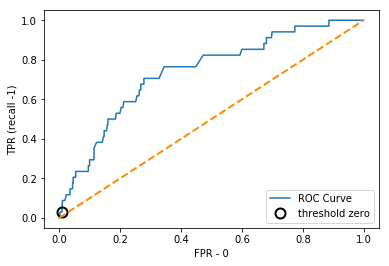

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, clf0.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR - 0")
plt.ylabel("TPR (recall -1)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.legend(loc=4)

In [45]:
svc_auc = roc_auc_score(y_test, clf0.decision_function(X_test))
svc_auc

0.7374298267024653

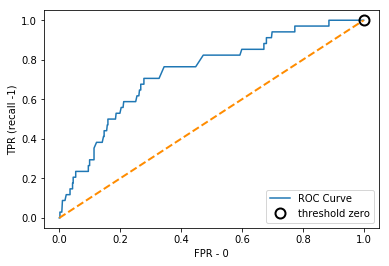

In [46]:
probas_ = clf0.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR - 0")
plt.ylabel("TPR (recall -1)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.legend(loc=4)

In [47]:
#### Area Bajo la Curva
svc_auc = roc_auc_score(y_test, probas_[:, 1])
svc_auc

0.7374298267024653

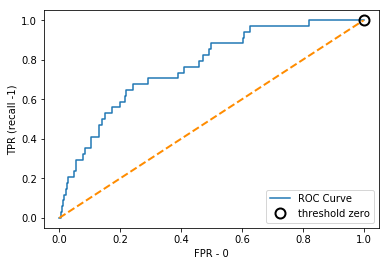

In [48]:
probas_ = abc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR - 0")
plt.ylabel("TPR (recall -1)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.legend(loc=4)

In [49]:
#### Area Bajo la Curva
svc_auc = roc_auc_score(y_test, probas_[:, 1])
svc_auc

0.7673297534781547

## o	En general los algoritmos empleados con AdaBoost (svc, DecisionTreeClassifier), dan un buen desempeño para la clase negativa mayoritaria.
### SVM con balanceo de clases es mas costosa computacionalmente
### Cuando se usa las medidas de decisión retornadas por la función "decision_function" el umbral cero "threshold zero" se encuentra en el punto cero (0), por el desbalanceo de clases y malos indicadores para la clase positiva, por lo cual es conveniente usar la probabilidad estimada de la clase positiva (1)    
### En comparación RandomForest y  AdaBoost para  este caso tienen métricas similares ,  tal vez con un mejor ajuste para AdaBoost con svc kernel lineal y clases balanceadas con una área Bajo la curva ROC de 0.767, en comparación a 0.713 con RandomForest.